In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import umap

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn import metrics

from sklearn.model_selection import train_test_split

C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

In [2]:
df=pd.read_csv('grades.csv').dropna()
df.columns

Index(['id', 'surname', 'name', 'code', 'orthography', 'punctuation', 'grade',
       'aligned_doc', 'type', 'surname_doc', 'name_doc', 'code_doc',
       'fractal_dim', 'space_length_std', 'space_length_mean',
       'word_width_mean', 'word_height_mean', 'word_width_std',
       'word_height_std'],
      dtype='object')

In [15]:
df

,id,surname,name,code,orthography,punctuation,grade,aligned_doc,type,surname_doc,name_doc,code_doc,fractal_dim,space_length_std,space_length_mean,word_width_mean,word_height_mean,word_width_std,word_height_std
0,66717_1,харитонова,анастасия,чернослив,0.0,1.0,5,True,msk23,True,True,True,1.420298,55.737369,53.603774,257.209327,50.055793,118.190194,8.883130
1,66717_2,рачкова,екатерина,анна,0.0,2.0,4,True,msk23,True,True,True,1.575400,37.608957,24.038168,230.462712,53.179430,113.365492,7.599010
2,66717_3,ефимова,елена,превосходно,4.0,5.0,2,True,msk23,True,True,True,1.534815,66.846088,49.040698,236.823072,53.649396,113.461925,9.138695
3,66717_4,деянова,юлия,асфальт,3.0,4.0,3,True,msk23,False,True,True,1.554644,80.166095,54.200000,233.258644,53.002609,117.492249,7.919873
4,66717_5,соловьева,нелля,счастье,1.0,3.0,4,True,msk23,True,True,True,1.501338,47.161881,42.583333,254.317524,54.462915,122.593031,8.481969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,00437_76,гатальская,светлана,красота,1.0,0.0,4,True,nov23,True,True,True,1.539883,15.930888,29.223140,292.940155,57.229071,132.518859,7.923943
21297,00437_77,войлошникова,ольга,астра,0.0,2.0,4,True,nov23,True,True,True,1.539795,29.028023,33.414508,198.436039,51.433014,94.091875,7.310495
21298,00437_78,колеватова,елена,доброта,1.0,6.0,3,True,nov23,True,True,True,1.470746,57.210077,43.472362,187.462682,49.653891,87.705171,7.940040
21299,00437_79,капитонова,татьяна,татьяна,3.0,7.0,2,True,nov23,True,True,True,1.460825,67.955820,34.196347,183.167757,48.136509,88.427869,8.937027


In [174]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df[['grade','orthography', 'punctuation','fractal_dim', 'space_length_std', 'space_length_mean',
       'word_width_mean', 'word_height_mean', 'word_width_std', 'word_height_std']])

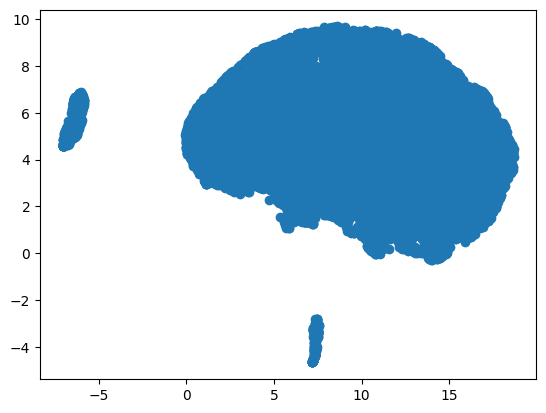

In [175]:
plt.
plt.scatter(embedding[:,0],embedding[:,1])
plt.show()

## Random forest

In [3]:
df_all=df[(df.orthography<30) & (df.punctuation <30)]
df_all['grade']=df_all['grade']>3
df_all['grade']=df_all['grade'].astype(np.uint8)

df_tmp=df_all[df_all.grade==0].iloc[:6000]
df_all=df_all[df_all.grade!=0]

df_dataset=pd.concat([df_all, df_tmp])

x=df_dataset[['fractal_dim', 'space_length_std', 'space_length_mean',
       'word_width_mean', 'word_height_mean', 'word_width_std',
       'word_height_std']]
x=(x-x.mean())/x.std()


# y=df_tmp[['orthography', 'punctuation']]
y=df_dataset['grade']




# y=(y-y.mean())/y.std()
# y=(y-y.min())/(y.max()-y.min())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_12020\2495977334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['grade']=df_all['grade']>3
C:\Users\Администратор\AppData\Local\Temp\ipykernel_12020\2495977334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['grade']=df_all['grade'].astype(np.uint8)


(array([6000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

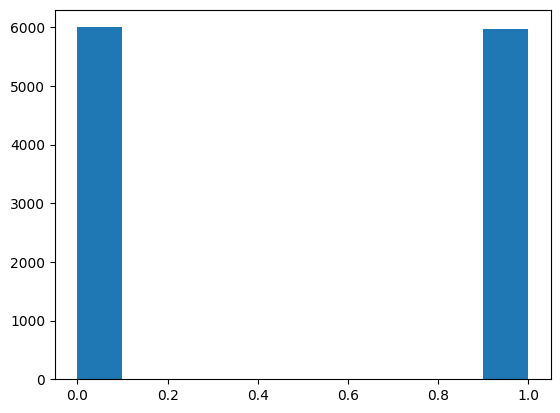

In [208]:
plt.hist(y)

In [218]:
rf = RandomForestClassifier(max_depth=50, random_state=0)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.6210350584307178

In [229]:
rf.feature_importances_

array([0.13306838, 0.16671263, 0.1276357 , 0.1463809 , 0.15270557,
       0.14302044, 0.13047637])

In [230]:
predicted=rf.predict(x_test)
m=metrics.confusion_matrix(y_test,predicted)
m=m/np.sum(m)
print(m,'\n')
print(metrics.classification_report(y_test,predicted))

[[0.33222037 0.15108514]
 [0.2278798  0.28881469]] 

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       579
           1       0.66      0.56      0.60       619

    accuracy                           0.62      1198
   macro avg       0.62      0.62      0.62      1198
weighted avg       0.63      0.62      0.62      1198



## XGBoost

In [5]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [6]:
bst = XGBClassifier(n_estimators=400, max_depth=30, learning_rate=1)
# bst = XGBRegressor(n_estimators=400, max_depth=30, learning_rate=1)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

bst.fit(x_train, y_train)

bst.score(x_test,y_test)

0.6035058430717863

In [7]:
bst.feature_importances_

array([0.13123724, 0.17177488, 0.1215875 , 0.15172082, 0.15561591,
       0.14818573, 0.11987801], dtype=float32)

In [8]:
predicted=bst.predict(x_test)
m=metrics.confusion_matrix(y_test,predicted)
m=m/np.sum(m)
print(m,'\n')
print(metrics.classification_report(y_test,predicted))

[[0.3096828  0.19616027]
 [0.20033389 0.29382304]] 

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       606
           1       0.60      0.59      0.60       592

    accuracy                           0.60      1198
   macro avg       0.60      0.60      0.60      1198
weighted avg       0.60      0.60      0.60      1198



## NN

In [221]:
from sklearn.neural_network import  MLPClassifier

In [222]:
regr = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=512).fit(x_train, y_train)
regr.score(x_test, y_test)

0.6352253756260434

In [228]:
predicted=regr.predict(x_test)
m=metrics.confusion_matrix(y_test,predicted)
m=m/np.sum(m)
print(m,'\n')
print(metrics.classification_report(y_test,predicted))

[[0.36811352 0.11519199]
 [0.24958264 0.26711185]] 

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       579
           1       0.70      0.52      0.59       619

    accuracy                           0.64      1198
   macro avg       0.65      0.64      0.63      1198
weighted avg       0.65      0.64      0.63      1198

